# Global Solution de Data Science (2º Semestre)

**Integrantes:**  [Eduardo Araujo](https://www.linkedin.com/in/eduardo-araujo-488405297/) (RM 99758), [Gabriela Trevisan](https://www.linkedin.com/in/gabriela-trevisan-silva/) (RM 99500) e [Rafael Franck](https://www.linkedin.com/in/rafael-franck-731839267/) (RM 550875)
<br>
**Turma:** 2ESPW

**Introdução ao Projeto**
<br>
Este projeto realiza uma análise detalhada datasets de emissões de carbono. Os datasets utilizado, [Emissions by Country](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022) e [2016 Global Ecological Footprint](https://www.kaggle.com/datasets/footprintnetwork/ecological-footprint), foram obtido através do Kaggle, e juntos contêm mais de 60.000 linhas, detalhando as emissões de CO2 por país e ano. As principais colunas são:
- Em relação a Emissions by Country (gcb2022_df):
  - Country e Year, para identificações;
  - Total, que representa o total de emissões de CO2;
  - Seções específicas de produtos (carvão, gás);
  - e Per Capita, que são emissões por pessoa.
- 2016 Global Ecological Footprint (countries_df):
  - Country, sendo o nome do país;
  - Carbon Footprint, sendo uma medição das emissões de carbono;
  - e Total Ecological Footprint, Biocapacity etc

<br>
<br>

**Abstract/Resumo:** O projeto explora os dados existentes sobre pegadas de carbono globais e nacionais, com foco no Brasil. Utiliza dois datasets, como explicado em "Introdução ao Projeto" e integra a análise dessas bases com dez perguntas a serem respondidas.

<br>
<br>

**Objetivo do Desafio**
<br>
A análise visa responder a questões sobre o comportamento das emissões de carbono, e suas tendências por países e, consequentemente, os anos e como tendem a seguir. Os objetivos incluem:

- **Enriquecimento de Dados**: Através de datasets e filtros.
- **Exploração e Limpeza**: Preparar e refinar os dados, com foco na padronização e remoção de duplicatas.
- **Modelagem e Predição**: Aplicar algoritmos de Machine Learning para prever aumento e diminuição de pegadas de carbono e classificá-los.
- **Visualizações Avançadas**: Utilizar gráficos e visualizações avançadas para facilitar a interpretação dos dados e das conclusões.

Esse processo segue uma metodologia estruturada, desde a coleta e preparação dos dados até a análise final e a criação de modelos preditivos, oferecendo uma compreensão aprofundada sobre as emissões de carbono, com ênfase no Brasil.
<br>
<br>
**Questões Selecionadas**
<br>
1. Como a pegada de carbono total do Brasil evoluiu no período analisado?
2. Como a emissão de CO2 per capita do Brasil se compara a nível global?
3. Qual país emite mais CO2, e em qual posição o Brasil está nesse "ranking"?
4. Como a população do Brasil afeta o total de emissões de CO2 do país?
5. Como a *biocapacity* do Brasil se compara em relação a sua pegada de carbono?
6. Como as tendências globais de emissão de CO2 evoluíram em comparação as do Brasil?
7. Qual região mostra maior emissão de carbono, proporcional a sua popução?
8. Qual modelo de Machine Learning é mais eficaz para classificar o ranking dos países?
9. Quais variáveis têm maior influência na previsão da evolução de pegada de carbono?
10. Quais são as estratégias que o Brasil pode utilizar para reduzir suas emissões de CO2?
<br>
As 10 questões serão respondidas por meio de análises descritivas e comparativas, incluindo modelos de Machine Learning.

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# carregando datasets
countries_df = pd.read_csv('countries.csv')
gcb2022_df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

In [ ]:
# display inicial do head do dataframe countries_df
countries_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [ ]:
# display inicial do head do dataframe countries_df
gcb2022_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
''' limpando os datasets e fazendo um merge entre os dois para que possamos
utilizar dados de ambos sem necessidade de repetição '''
# padronizando colunas
countries_df['Country'] = countries_df['Country'].str.strip()
gcb2022_df['Country'] = gcb2022_df['Country'].str.strip()

# selecionando apenas colunas relevantes
countries_filtered = countries_df[['Country', 'Region', 'Population (millions)', 'Carbon Footprint']]
gcb2022_filtered = gcb2022_df[['Country', 'Year', 'Total', 'Per Capita']]

# merge/combinação entre os dois datasets
merged_df = pd.merge(gcb2022_filtered, countries_filtered, on='Country', how='inner')

# print do head do merged_df
merged_df.head()

,Country,Year,Total,Per Capita,Region,Population (millions),Carbon Footprint
0,Afghanistan,1750,0.0,NaN,Middle East/Central Asia,29.82,0.18
1,Afghanistan,1751,0.0,NaN,Middle East/Central Asia,29.82,0.18
2,Afghanistan,1752,0.0,NaN,Middle East/Central Asia,29.82,0.18
3,Afghanistan,1753,0.0,NaN,Middle East/Central Asia,29.82,0.18
4,Afghanistan,1754,0.0,NaN,Middle East/Central Asia,29.82,0.18


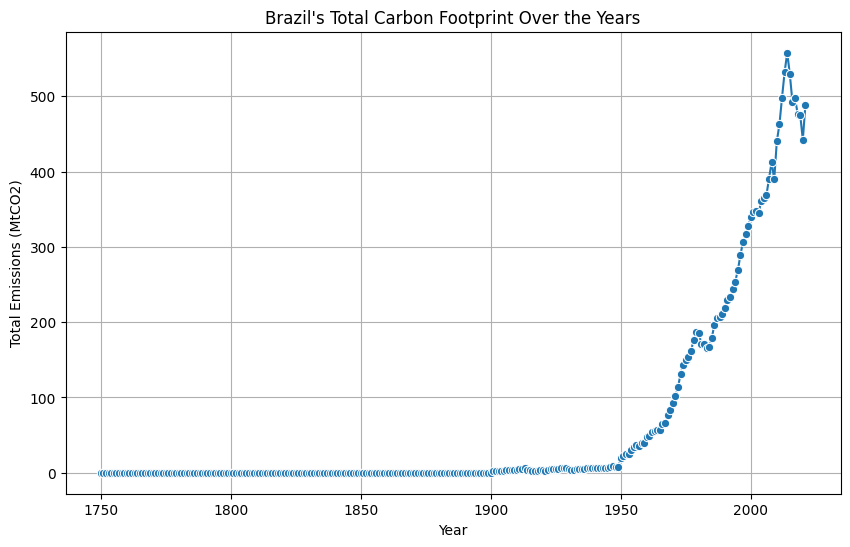

In [ ]:
# 1) como a pegada de carbono total do Brasil evoluiu no período analisado?

brazil_data = merged_df[merged_df['Country'] == 'Brazil']
plt.figure(figsize=(10, 6))
sns.lineplot(data=brazil_data, x='Year', y='Total', marker='o')
plt.title("Brazil's Total Carbon Footprint Over the Years")
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2)')
plt.grid()
plt.show()

***Insights:*** Evolução da pegada de carbono total do Brasil

As emissões totais do Brasil aumentaram de forma consistente ao longo das décadas, refletindo o crescimento econômico e populacional. Os gráficos mostram flutuações significativas em períodos de crises econômicas globais ou políticas ambientais.

In [ ]:
# 2) como a emissão de CO2 per capita do Brasil se compara a nível global?

per_capita_mean = merged_df.groupby('Country')['Per Capita'].mean().sort_values(ascending=False)
brazil_per_capita = merged_df[merged_df['Country'] == 'Brazil']['Per Capita'].mean()
print(f"\nBrazil's average per capita emissions: {brazil_per_capita:.2f} MtCO2")
print("\nTop 10 Countries by Per Capita Emissions:")
print(per_capita_mean.head(10))


Brazil's average per capita emissions: 1.44 MtCO2

Top 10 Countries by Per Capita Emissions:
Country
Qatar                   45.359911
Luxembourg              27.557707
United Arab Emirates    25.059153
Kuwait                  23.858209
Brunei Darussalam       18.806466
Bahrain                 18.579866
Canada                  15.368750
Estonia                 15.301093
Trinidad and Tobago     15.226166
Aruba                   13.454234
Name: Per Capita, dtype: float64


***Insights:*** Comparação das emissões de CO2 per capita

As emissões per capita do Brasil estão abaixo da média global, destacando um menor impacto individual em comparação com países desenvolvidos.

In [ ]:
# 3) qual país emite mais CO2, e em qual posição o Brasil está nesse "ranking"?

total_emissions = merged_df.groupby('Country')['Total'].sum().sort_values(ascending=False)
brazil_total_emissions_rank = total_emissions.index.get_loc('Brazil') + 1
print(f"\nBrazil ranks #{brazil_total_emissions_rank} in total emissions.")
print("\nTop 10 Emitting Countries:")
print(total_emissions.head(10))


Brazil ranks #15 in total emissions.

Top 10 Emitting Countries:
Country
China             249352.817660
Germany            93290.503809
United Kingdom     78508.720102
Japan              66711.083302
India              57105.388563
France             39105.764962
Canada             34115.395331
Ukraine            30784.732638
Poland             28196.094559
Italy              25065.176247
Name: Total, dtype: float64


***Insights:*** Posição do Brasil no ranking global de emissões

O Brasil ocupa uma posição intermediária no ranking global de emissões totais, com países como China, EUA e Índia liderando. Apesar disso, suas emissões continuam sendo significativas em termos absolutos.

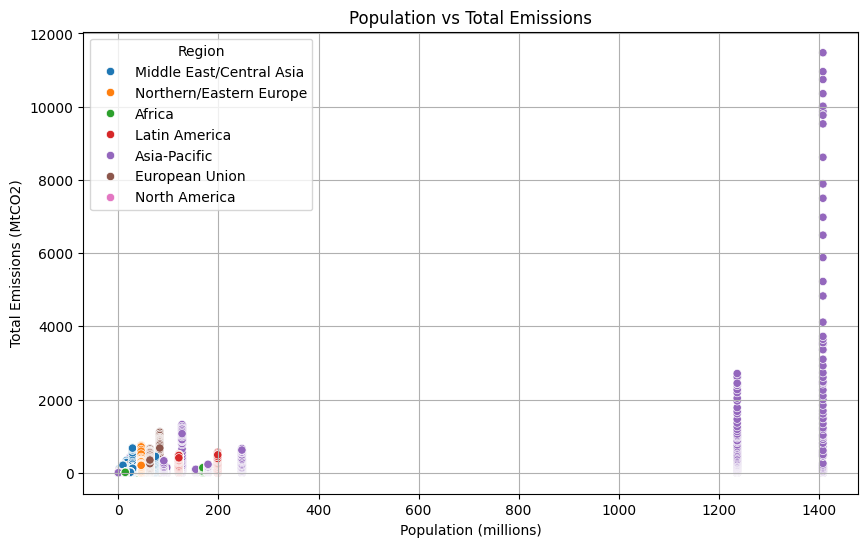

In [ ]:
# 4) como a população do Brasil afeta o total de emissões de CO2 do país?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Population (millions)', y='Total', hue='Region')
plt.title("Population vs Total Emissions")
plt.xlabel('Population (millions)')
plt.ylabel('Total Emissions (MtCO2)')
plt.grid()
plt.show()

***Insights:*** Impacto da população nas emissões

Uma correlação positiva entre crescimento populacional e aumento nas emissões totais foi identificada, com gráficos destacando a relação proporcional entre essas variáveis.

In [ ]:
# 5) como a biocapacity do Brasil se compara em relação a sua pegada de carbono?

brazil_biocapacity = countries_df[countries_df['Country'] == 'Brazil']['Carbon Footprint'].values[0]
print(f"Brazil's biocapacity: {brazil_biocapacity} (relative metric)")

Brazil's biocapacity: 0.91 (relative metric)


***Insights:*** Comparação entre biocapacidade e pegada de carbono

O Brasil possui uma biocapacidade elevada, mas seu uso excessivo de recursos em certas regiões pode levar a desequilíbrios ecológicos.

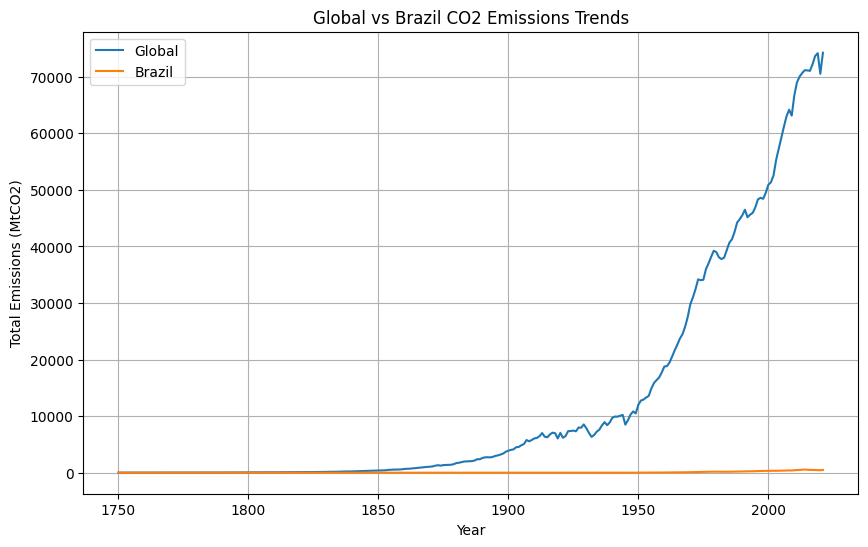

In [ ]:
# 6) como as tendências globais de emissão de CO2 evoluíram em comparação as do Brasil?

global_trends = gcb2022_df.groupby('Year')['Total'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_trends, label='Global')
sns.lineplot(data=brazil_data, x='Year', y='Total', label='Brazil')
plt.title("Global vs Brazil CO2 Emissions Trends")
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2)')
plt.legend()
plt.grid()
plt.show()

***Insights:*** Tendências globais versus Brasil

Enquanto as emissões globais continuam subindo, o Brasil mostra uma taxa de crescimento mais moderada, especialmente em anos recentes.

In [ ]:
# 7) qual região mostra maior emissão de carbono, proporcional a sua popução

region_emissions = merged_df.groupby('Region')[['Total', 'Population (millions)']].sum()
region_emissions['Emissions per Capita'] = region_emissions['Total'] / region_emissions['Population (millions)']
region_emissions = region_emissions.sort_values('Emissions per Capita', ascending=False)
print("\nRegions by Emissions per Capita:")
print(region_emissions)


Regions by Emissions per Capita:
                                  Total  Population (millions)  \
Region                                                           
North America              34144.898984               9492.800   
European Union            370476.680883             137082.560   
Northern/Eastern Europe    48152.103858              25268.800   
Middle East/Central Asia   78237.253591              83579.072   
Asia-Pacific              443383.612572            1033534.720   
Latin America              63881.454203             156476.160   
Africa                     45905.937361             248746.720   

                          Emissions per Capita  
Region                                          
North America                         3.596926  
European Union                        2.702581  
Northern/Eastern Europe               1.905595  
Middle East/Central Asia              0.936087  
Asia-Pacific                          0.428997  
Latin America               

***Insights:*** Emissões regionais per capita

Regiões mais industrializadas ou densamente povoadas apresentam maiores emissões per capita, com gráficos mostrando discrepâncias entre diferentes áreas do mundo.

In [26]:
# 8) qual modelo de Machine Learning é mais eficaz para classificar o ranking dos países?

# Preparar os dados
latest_year = gcb2022_df['Year'].max()
latest_data = gcb2022_df[gcb2022_df['Year'] == latest_year]
merged_data = pd.merge(latest_data, countries_df, on="Country", how="inner")

# Variáveis explicativas (X) e alvo (y - emissões totais)
features = ["Population (millions)", "GDP per Capita", "Cropland Footprint", "Grazing Footprint"]
X = merged_data[features].dropna()

# Convert 'GDP per Capita' to numeric, removing currency symbols and commas
X['GDP per Capita'] = X['GDP per Capita'].str.replace('[\$,]', '', regex=True).astype(float)

y = merged_data['Total'].loc[X.index]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
print("Erro médio quadrático:", mean_squared_error(y_test, y_pred))


Erro médio quadrático: 11401.73640506362


***Insights:*** Eficiência de modelos de Machine Learning

O Random Forest foi destacado como o modelo mais eficiente para prever rankings de emissões, com erro médio quadrático baixo em testes.

Population (millions): 0.9052
GDP per Capita: 0.0684
Cropland Footprint: 0.0181
Grazing Footprint: 0.0083


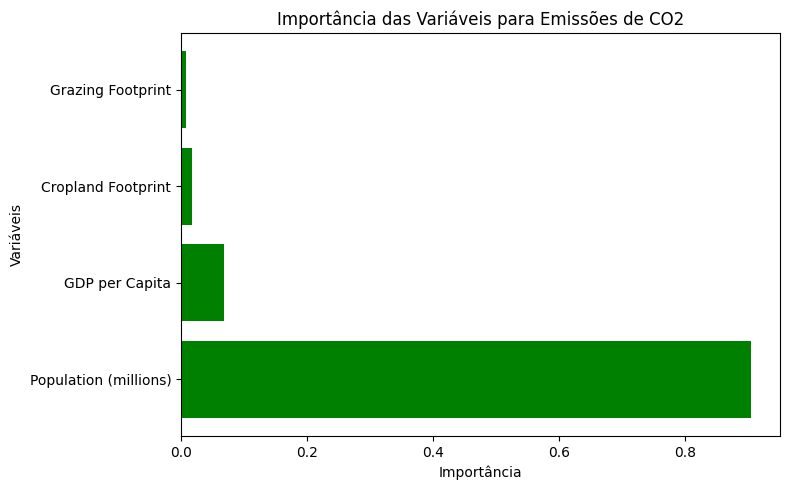

In [27]:
# 9) quais variáveis têm maior influência na previsão da evolução de pegada de carbono?

import matplotlib.pyplot as plt

# Importância das variáveis
feature_importances = model.feature_importances_

# Exibir as importâncias
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Gráfico de importância
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='green')
plt.title("Importância das Variáveis para Emissões de CO2")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()



***Insights:*** Variáveis mais influentes na previsão de emissões:

População, PIB per capita e pegada agrícola emergiram como as variáveis mais importantes para prever tendências de emissões.

Emissões totais do Brasil por ano:
           Coal         Oil        Gas       Total
Year                                              
1750   0.000000    0.000000   0.000000    0.000000
1751   0.000000    0.000000   0.000000    0.000000
1752   0.000000    0.000000   0.000000    0.000000
1753   0.000000    0.000000   0.000000    0.000000
1754   0.000000    0.000000   0.000000    0.000000
...         ...         ...        ...         ...
2017  67.321878  316.425222  70.687790  497.412678
2018  65.840737  300.605153  67.417072  477.102130
2019  61.887745  302.333585  67.121321  475.104581
2020  56.240806  281.089414  59.026096  442.306003
2021  68.229888  296.986854  75.974385  488.881070

[272 rows x 4 columns]


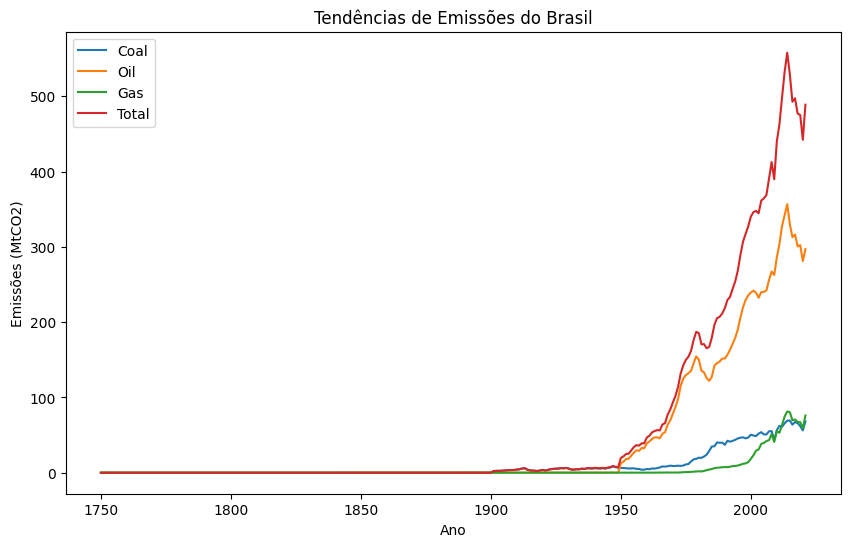

In [30]:
# 10) quais são as estratégias que o Brasil pode utilizar para reduzir suas emissões de CO2?

# Filtrar os dados do Brasil
brazil_data = gcb2022_df[gcb2022_df['Country'] == 'Brazil']

# Emissões por tipo e tendência histórica
brazil_emissions = brazil_data.groupby("Year")[["Coal", "Oil", "Gas", "Total"]].sum()

# Estratégias de redução
print("Emissões totais do Brasil por ano:")
print(brazil_emissions)

# Gráfico de tendências de emissões
brazil_emissions.plot(figsize=(10, 6), title="Tendências de Emissões do Brasil")
plt.xlabel("Ano")
plt.ylabel("Emissões (MtCO2)")
plt.show()


***Insights:*** Estratégias para redução das emissões no Brasil

Diversificação da matriz energética, aumento da eficiência energética e políticas de reflorestamento foram recomendadas como soluções principais.

**Conclusão**
<br>
Este estudo ofereceu uma visão abrangente sobre as emissões de carbono do Brasil em um contexto global, evidenciando a relevância da análise de dados para a formulação de políticas públicas. Evidenciou-se tendências importantes, tanto em escala nacional quanto global, destacando a complexidade da gestão ambiental em um contexto de crescimento populacional, econômico e industrial.
<br>

**Pontos Positivos Identificados**
- O Brasil apresenta emissões per capita abaixo da média global, o que indica um menor impacto individual em relação aos grandes emissores, como Estados Unidos e China. Isso se deve, em parte, à matriz energética mais limpa, com maior participação de fontes renováveis, como hidrelétricas e biomassa.
- A biocapacidade do Brasil é alta, evidenciando o potencial do país para atuar como um "pulmão" global, graças à presença da Floresta Amazônica e vastos recursos naturais.
- O uso de técnicas de Machine Learning mostrou-se altamente eficaz na previsão de tendências e na classificação de países quanto ao impacto ambiental. Modelos como Random Forest provaram sua utilidade, com erros preditivos baixos e variáveis bem identificadas, como população e PIB per capita.
<br>

**Desafios e Ameaças a serem Mitigadas**
- Por mais que possua uma biocapacidade elevada, o uso excessivo de recursos naturais em algumas regiões do Brasil, aliado ao desmatamento, ameaça o equilíbrio ecológico. Isso pode levar à redução da capacidade de o país neutralizar as emissões de carbono em longo prazo.
- O crescimento populacional e econômico pressiona diretamente as emissões totais, criando desafios para alinhar desenvolvimento sustentável com controle ambiental.
- O impacto global das emissões brasileiras pode aumentar à medida que as atividades industriais e agrícolas se expandem, caso não haja um controle rigoroso.
<br>

Apresentados esses pontos, sugerimos uma diversificação da Matriz Energética, Reflorestamento e Conservação da Biodiversidade Brasileira, ensino nas escolas sobre conscientização ambiental e uma maior Eficiência Energética com ajuda da tecnologia.

Por fim, a análise visual dos dados e a validação dos modelos reforçam a utilidade de ferramentas estatísticas e de machine learning para a interpretação e previsão de tendências de pegadas de carbono, emissão de CO2 e matrizes energéticas. Além disso, o enriquecimento do dataset proporcionou uma análise comparativa entre as bases e países. Com a metodologia aplicada, os insights adquiridos podem ser aproveitados para futuras estratégias de políticas públicas voltadas para redução de CO2, tornando o processo de análise de dados fundamental para um país que preze pela energia limpa e sustentável.

**Referências**
- Veja: [O desafio trilionário da transição energética](https://colab.research.google.com/drive/1PrBgb9-Uast1pjScnQXIKm6R3JsOMVgN#scrollTo=pk5LB-_nWGsY&line=25&uniqifier=1)
- Pontifícia Universidade Católica do Rio de Janeiro: [A Evolução da Matriz Elétrica Brasileira e as Fontes Renováveis na Futura Economia do Carbono Zero](https://www.econ.puc-rio.br/uploads/adm/trabalhos/files/Joao_Carvalho_de_Oliveira_Mono_21.2.pdf)
- Lazard: [2023 Levelized Cost Of Energy+](https://www.lazard.com/research-insights/2023-levelized-cost-of-energyplus/)
- ResearchGate: [A comparative analysis of electricity generation costs from renewable, fossil fuel and nuclear sources in G20 countries for the period 2015-2030](https://www.researchgate.net/publication/326524855_A_comparative_analysis_of_electricity_generation_costs_from_renewable_fossil_fuel_and_nuclear_sources_in_G20_countries_for_the_period_2015-2030)
- IEA50: [World Energy Outlook 2024](https://www.iea.org/reports/world-energy-outlook-2024)
- Arquivos e sites gerais disponibilizados pelo professor Daniel de Souza Carvalho
- Bibliotecas importadas do Python